In [91]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
import numpy as np
from math import trunc

In [92]:
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

In [93]:
# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

In [94]:
# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_df = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_df = pd.read_csv(clinical_trial_data_to_load)

In [95]:
# Combine the data into a single dataset
combined = pd.merge(clinical_trial_df, mouse_drug_df, on=('Mouse ID'))

In [96]:
# Display the data table for preview
combined.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


 Tumor Response to Treatment

In [97]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
Tumor_response =  combined.groupby(['Drug','Timepoint']).mean()['Tumor Volume (mm3)']

In [98]:
merged_df = pd.merge(clinical_trial_df, mouse_drug_df, on=('Mouse ID'))
merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [99]:
# Convert to DataFrame
tumor_vol_df = merged_df.loc[:,['Drug', 'Timepoint', 'Tumor Volume (mm3)']]

In [100]:
# Preview DataFrame
tumor_vol_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,45.651331
2,Capomulin,10,43.270852
3,Capomulin,15,43.784893
4,Capomulin,20,42.731552


In [101]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
# Convert to DataFrame
mean_sem_tv = tumor_vol_df.groupby(['Drug', 'Timepoint']).agg({"Tumor Volume (mm3)" :["mean", "sem"]})

In [102]:
# Preview DataFrame
mean_sem_tv.head()

Tumor Volume (mm3)          
                                  mean       sem
Drug      Timepoint                             
Capomulin 0                  45.000000  0.000000
          5                  44.266086  0.448593
          10                 43.084291  0.702684
          15                 42.064317  0.838617
          20                 40.716325  0.909731

In [103]:
# Minor Data Munging to Re-Format the Data Frames
Tumor_response = pd.pivot_table(combined, index='Timepoint', columns='Drug', values='Tumor Volume (mm3)', aggfunc = np.mean)

In [104]:
# Preview that Reformatting worked
Tumor_response

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


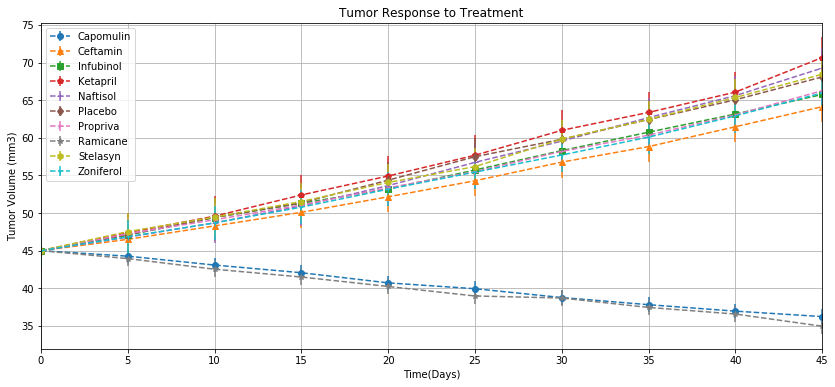

In [105]:
# Generate the Plot (with Error Bars)
Timepoint = Tumor_response.index
plt.figure(figsize=(14,6))
plt.errorbar(Timepoint, Tumor_response['Capomulin'],yerr=Tumor_response['Capomulin'].sem(), marker ='o', linestyle='--', label="Capomulin")
plt.errorbar(Timepoint, Tumor_response['Ceftamin'],yerr=Tumor_response['Ceftamin'].sem(), marker ='^', linestyle='--', label="Ceftamin")
plt.errorbar(Timepoint, Tumor_response['Infubinol'],yerr=Tumor_response['Infubinol'].sem(), marker ='s', linestyle='--', label="Infubinol")
plt.errorbar(Timepoint, Tumor_response['Ketapril'],yerr=Tumor_response['Ketapril'].sem(), marker ='p', linestyle='--', label="Ketapril")
plt.errorbar(Timepoint, Tumor_response['Naftisol'],yerr=Tumor_response['Naftisol'].sem(), marker ='+', linestyle='--', label="Naftisol")
plt.errorbar(Timepoint, Tumor_response['Placebo'],yerr=Tumor_response['Placebo'].sem(), marker ='d', linestyle='--', label="Placebo")
plt.errorbar(Timepoint, Tumor_response['Propriva'],yerr=Tumor_response['Propriva'].sem(), marker ='4', linestyle='--', label="Propriva")
plt.errorbar(Timepoint, Tumor_response['Ramicane'],yerr=Tumor_response['Ramicane'].sem(), marker ='*', linestyle='--', label="Ramicane")
plt.errorbar(Timepoint, Tumor_response['Stelasyn'],yerr=Tumor_response['Stelasyn'].sem(), marker ='h', linestyle='--', label="Stelasyn")
plt.errorbar(Timepoint, Tumor_response['Zoniferol'],yerr=Tumor_response['Zoniferol'].sem(), marker ='1', linestyle='--', label="Zoniferol")
plt.gca().set(xlabel = 'Time(Days)', ylabel = 'Tumor Volume (mm3)',title = 'Tumor Response to Treatment',xlim = (0,max(Timepoint)))
#legend 
plt.legend(loc = 'best', frameon=True)
plt.grid()

In [106]:
# Save the Figure
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [107]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
# Convert to DataFrame
Timepoint_response =  combined.groupby(['Drug','Timepoint']).mean()[['Metastatic Sites']]


In [108]:
# Preview DataFrame
Timepoint_response.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [109]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
# Convert to DataFrame
meta_sites_df = merged_df.loc[:,['Drug', 'Timepoint', 'Metastatic Sites']]
mean_sem_meta = meta_sites_df.groupby(['Drug', 'Timepoint']).agg({"Metastatic Sites" :["sem"]})

In [110]:
# Preview DataFrame
mean_sem_meta.head()

Metastatic Sites
                                 sem
Drug      Timepoint                 
Capomulin 0                 0.000000
          5                 0.074833
          10                0.125433
          15                0.132048
          20                0.161621

In [111]:
# Minor Data Munging to Re-Format the Data Frames
# Preview that Reformatting worked
Metastatic_sites = pd.pivot_table(Timepoint_response, index='Timepoint', columns='Drug', values='Metastatic Sites', aggfunc = np.mean)
Metastatic_sites

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


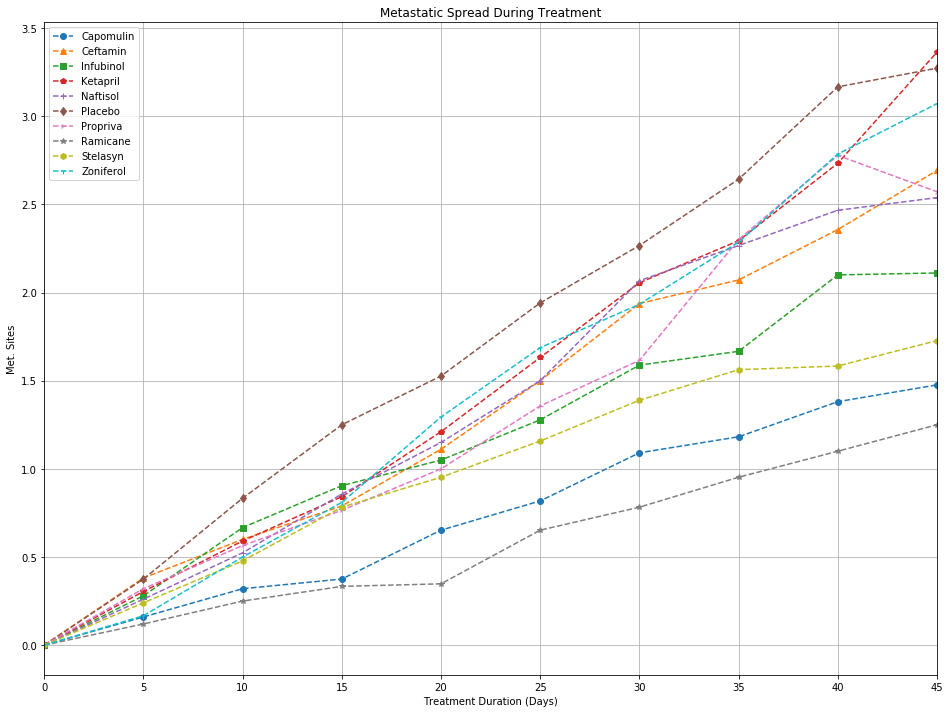

In [112]:
# Generate the Plot (with Error Bars)
Metastatic = Metastatic_sites.index
plt.figure(figsize=(16,12))

plt.plot(Metastatic, Metastatic_sites['Capomulin'], marker ='o', linestyle='--', label="Capomulin")
plt.plot(Metastatic, Metastatic_sites['Ceftamin'], marker ='^', linestyle='--', label="Ceftamin")
plt.plot(Metastatic, Metastatic_sites['Infubinol'], marker ='s', linestyle='--', label="Infubinol")
plt.plot(Metastatic, Metastatic_sites['Ketapril'], marker ='p', linestyle='--', label="Ketapril")
plt.plot(Metastatic, Metastatic_sites['Naftisol'], marker ='+', linestyle='--', label="Naftisol")
plt.plot(Metastatic, Metastatic_sites['Placebo'], marker ='d', linestyle='--', label="Placebo")
plt.plot(Metastatic, Metastatic_sites['Propriva'], marker ='4', linestyle='--', label="Propriva")
plt.plot(Metastatic, Metastatic_sites['Ramicane'], marker ='*', linestyle='--', label="Ramicane")
plt.plot(Metastatic, Metastatic_sites['Stelasyn'], marker ='h', linestyle='--', label="Stelasyn")
plt.plot(Metastatic, Metastatic_sites['Zoniferol'], marker ='1', linestyle='--', label="Zoniferol")
plt.gca().set(xlabel = 'Treatment Duration (Days)', ylabel = 'Met. Sites',title = 'Metastatic Spread During Treatment',xlim = (0,max(Metastatic)))
plt.legend(loc = 'best', frameon=True)
plt.grid()
# Save the Figure

# Show the Figure
plt.show()

## Survival Rates

In [113]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
# Convert to DataFrame
mouse_response =  combined.groupby(['Drug','Timepoint']).count()[['Mouse ID']]


In [114]:
# Preview DataFrame
mouse_response.head()

Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23

In [115]:
# Minor Data Munging to Re-Format the Data Frames
# Preview the Data Frame
Survival_pivot = pd.pivot_table(mouse_response, index='Timepoint', columns='Drug', values='Mouse ID', aggfunc = np.mean)
Survival_pivot


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [116]:
# Generate the Plot (Accounting for percentages)
Survival_percentage = Survival_pivot.copy()
Survival_percentage = round(Survival_percentage.apply(lambda c: c / c.max() * 100, axis=0),2)
Survival_percentage
# Save the Figure

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,100.00,100.0,100.00,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,96.15,100.0,96.15,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,88.46,96.0,88.46,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,65.38,96.0,88.46,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,65.38,92.0,80.77,68.0
25,88.0,72.0,72.0,76.0,72.0,68.0,53.85,92.0,73.08,64.0
30,88.0,64.0,68.0,72.0,60.0,60.0,50.00,92.0,69.23,60.0
35,88.0,56.0,48.0,68.0,60.0,56.0,38.46,84.0,61.54,56.0
40,84.0,56.0,40.0,60.0,60.0,48.0,34.62,80.0,46.15,56.0


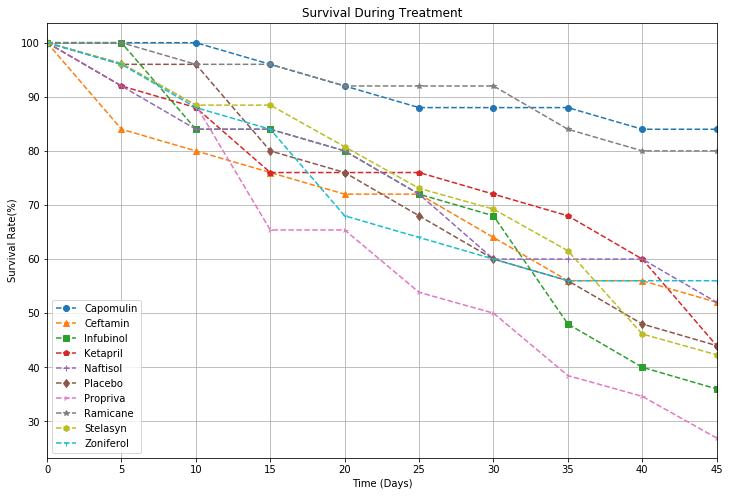

In [117]:
# Show the Figure
Survival_rate =  Survival_percentage.index

plt.figure(figsize=(12,8))

plt.plot(Survival_rate, Survival_percentage['Capomulin'], marker ='o', linestyle='--', label="Capomulin")
plt.plot(Survival_rate, Survival_percentage['Ceftamin'], marker ='^', linestyle='--', label="Ceftamin")
plt.plot(Survival_rate, Survival_percentage['Infubinol'], marker ='s', linestyle='--', label="Infubinol")
plt.plot(Survival_rate, Survival_percentage['Ketapril'], marker ='p', linestyle='--', label="Ketapril")
plt.plot(Survival_rate, Survival_percentage['Naftisol'], marker ='+', linestyle='--', label="Naftisol")
plt.plot(Survival_rate, Survival_percentage['Placebo'], marker ='d', linestyle='--', label="Placebo")
plt.plot(Survival_rate, Survival_percentage['Propriva'], marker ='4', linestyle='--', label="Propriva")
plt.plot(Survival_rate, Survival_percentage['Ramicane'], marker ='*', linestyle='--', label="Ramicane")
plt.plot(Survival_rate, Survival_percentage['Stelasyn'], marker ='h', linestyle='--', label="Stelasyn")
plt.plot(Survival_rate, Survival_percentage['Zoniferol'], marker ='1', linestyle='--', label="Zoniferol")
plt.gca().set(xlabel = 'Time (Days)', ylabel = 'Survival Rate(%)',title = 'Survival During Treatment',xlim = (0,max(Survival_rate)))
plt.legend(loc = 'best', frameon=True)
plt.grid()
plt.show()

## Summary Bar Graph

In [118]:
# Calculate the percent changes for each drug

# Display the data to confirm
TumorChangePercent = (((Tumor_response.iloc[-1]-Tumor_response.iloc[0])/Tumor_response.iloc[0])*100).to_frame("% Change")
TumorChangePercent

,% Change
Drug,
Capomulin,-19.475303
Ceftamin,42.516492
Infubinol,46.123472
Ketapril,57.028795
Naftisol,53.923347
Placebo,51.297960
Propriva,47.241175
Ramicane,-22.320900
Stelasyn,52.085134


<Figure size 1152x576 with 0 Axes>

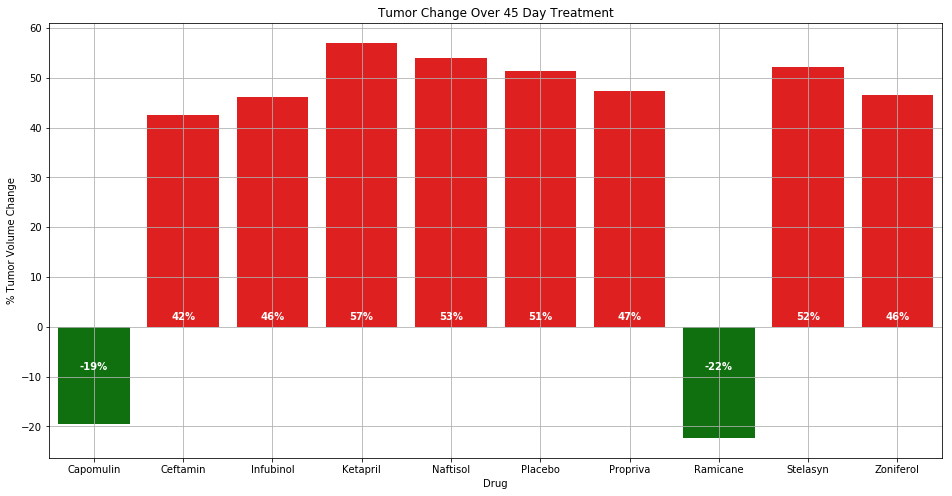

<Figure size 1152x576 with 0 Axes>

In [119]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes
x=TumorChangePercent.index
y=TumorChangePercent['% Change']
# Call functions to implement the function calls
plt.figure(figsize=(16,8))
colors = ['red' if _y >=0 else 'green' for _y in y]

# Show the Figure
plt.figure(figsize=(16,8))
colors = ['red' if _y >=0 else 'green' for _y in y]
ax = sn.barplot(x, y, palette=colors)
for n, (label, _y) in enumerate(zip(x, y)):
    if _y <= 0:
        ax.annotate(
            s='{:d}%'.format(trunc(_y)), xy=(n, -10), ha='center',va='center',
            xytext=(0,10), color='w', textcoords='offset points', weight='bold')
    else:
        ax.annotate(
            s='{:d}%'.format(trunc(_y)), xy=(n, 0), ha='center',va='center',
            xytext=(0,10), color='w', textcoords='offset points', weight='bold')  
plt.gca().set(xlabel='Drug', ylabel='% Tumor Volume Change', title='Tumor Change Over 45 Day Treatment')
plt.rc('grid', linestyle="--", color='black', linewidth=0.5)
plt.grid(True)

# Save the Figure
plt.figure(figsize=(16,8))
colors = ['red' if _y >=0 else 'green' for _y in y]

# Show the Figure
plt.show()